In [4]:
pip install tensorflow_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 1.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Data

In [7]:
df = pd.read_csv('data/combined_pose_data.csv')
df.head()

,class_name,metadata,x1,y1,z1,v1,x2,y2,z2,v2,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,ayesha,"spin, true_grip",0.550901532173157,0.452469408512116,-0.371652334928513,0.999634027481079,0.551996767520905,0.459261238574982,-0.373692780733109,0.999179065227509,...,-0.110185354948044,0.97651344537735,0.501697540283203,0.326334536075592,0.484908133745194,0.711136996746063,0.431104391813278,0.247272819280624,-0.227218180894852,0.988907516002655
1,ayesha,"spin, true_grip",0.550313651561737,0.456584453582764,-0.408107221126556,0.999585211277008,0.551725804805756,0.462751150131226,-0.418755561113358,0.99914014339447,...,0.205016225576401,0.97779905796051,0.496018379926682,0.349914938211441,0.744754374027252,0.718097865581513,0.450083166360855,0.246959403157234,0.100605793297291,0.989433228969574
2,ayesha,"spin, true_grip",0.550200760364533,0.460396617650986,-0.407223522663116,0.999601304531097,0.551819682121277,0.466391950845718,-0.416219681501389,0.999173760414124,...,0.364735126495361,0.978426575660706,0.470389485359192,0.366217911243439,0.815191566944122,0.715532183647156,0.466189026832581,0.248627513647079,0.263333767652512,0.989323079586029
3,ayesha,"spin, true_grip",0.554080247879028,0.459564983844757,-0.400975495576859,0.999601781368256,0.554280340671539,0.465722143650055,-0.408863842487335,0.999175667762756,...,0.200570553541183,0.977982401847839,0.475203692913055,0.354495465755463,0.705523192882538,0.724246919155121,0.511983454227448,0.253052622079849,0.0986333563923836,0.988872647285461
4,ayesha,"spin, true_grip",0.55398041009903,0.459447383880615,-0.382720917463303,0.999635696411133,0.555034399032593,0.465176969766617,-0.380493581295013,0.999244153499603,...,-0.0212578978389502,0.978842318058014,0.418205291032791,0.371975719928741,0.567162215709686,0.737097322940826,0.53110146522522,0.253462135791779,-0.137917727231979,0.98934006690979


In [8]:
df.shape

(3836, 134)

In [9]:
df['class_name'].unique()

array(['ayesha', 'cupid', 'outside_leg_hang', 'class_name',
       'inside_leg_hang'], dtype=object)

In [10]:
df = df[df['class_name'] != 'class_name']

In [11]:
df['class_name'].unique()

array(['ayesha', 'cupid', 'outside_leg_hang', 'inside_leg_hang'],
      dtype=object)

In [12]:
## Check class distribution for imbalances

class_distribution = df['class_name'].value_counts()
print("class distribution")
print(class_distribution)

class distribution
class_name
cupid               1255
outside_leg_hang    1163
inside_leg_hang      949
ayesha               468
Name: count, dtype: int64


# Setting up Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [ ]:
X = df.drop(['class_name', 'metadata'], axis=1)  
y = df['class_name']  

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

NameError: name 'X' is not defined

In [16]:
## Check dimensions match
print(f'The shape of X_train is: {X_train.shape} and the shape of y_train is {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape} and the shape of y_test is {y_test.shape}')

NameError: name 'X_train' is not defined

In [13]:
pose_tree = DecisionTreeClassifier(criterion="entropy", max_depth=1)
pose_tree

NameError: name 'DecisionTreeClassifier' is not defined

In [70]:
income_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [71]:
#predict
pre_tree = income_tree.predict(X_test)
print(pre_tree[0:5])
print(y_test[0:5])

[0 0 0 0 1]
11954    0
23686    1
6579     0
7700     0
28405    0
Name: income, dtype: int64


In [72]:
#Evaluate
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dt_accuracy = metrics.accuracy_score(y_test, pre_tree)
print(f"DecisionTrees's Accuracy: {dt_accuracy}")

DecisionTrees's Accuracy: 0.8393702008842008


#### <=50K is 0(False), >50K is 1(True)

<function matplotlib.pyplot.show(close=None, block=None)>

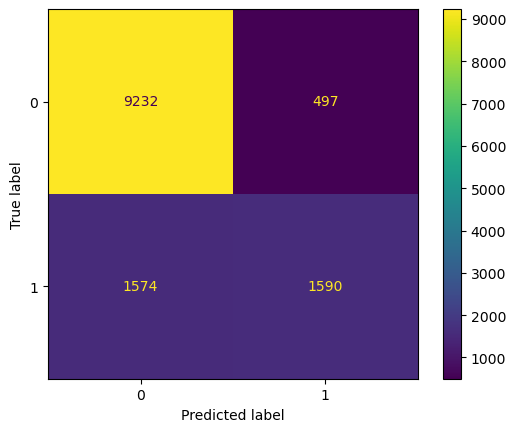

In [73]:
cm = confusion_matrix(y_test, pre_tree, labels=income_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show

# Deep Learning

In [74]:
#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 1

In [78]:
#Define the neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(12,)),      
    keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 units and ReLU activation
    keras.layers.Dense(1, activation='sigmoid') # Output layer with 1 unit and sigmoid activation (for binary classification)
])

In [79]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3569 - accuracy: 0.8350 - val_loss: 0.3361 - val_accuracy: 0.8432
Epoch 2/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3326 - accuracy: 0.8432 - val_loss: 0.3342 - val_accuracy: 0.8442
Epoch 3/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3275 - accuracy: 0.8445 - val_loss: 0.3305 - val_accuracy: 0.8455
Epoch 4/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3246 - accuracy: 0.8458 - val_loss: 0.3281 - val_accuracy: 0.8467
Epoch 5/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3222 - accuracy: 0.8482 - val_loss: 0.3252 - val_accuracy: 0.8471
Epoch 6/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3203 - accuracy: 0.8487 - val_loss: 0.3262 - val_accuracy: 0.8452
Epoch 7/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3193 - accuracy: 0.8490 - val_loss: 0.3243 - val_accuracy:

In [82]:
#Eval model on the test data
m1_test_loss, m1_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m1_test_accuracy * 100:.2f}%")

269/269 [==============================] - 1s 2ms/step - loss: 0.3235 - accuracy: 0.8507
Test Accuracy: 85.07%


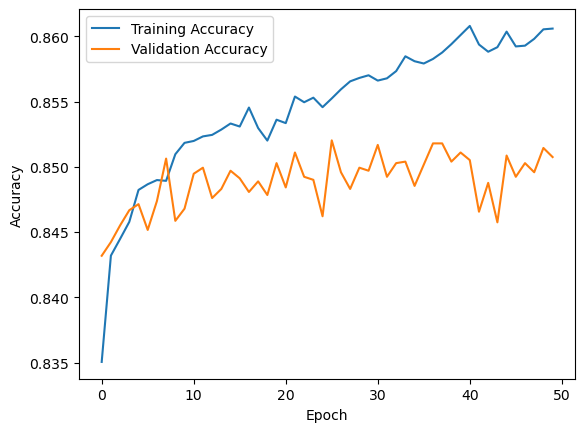

In [83]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 2

In [84]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(12,)),      # Input layer with 12 features
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dense(32, activation='relu'),  
    keras.layers.Dense(1, activation='sigmoid') # Output layer with 1 unit and sigmoid activation (for binary classification)
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3529 - accuracy: 0.8317 - val_loss: 0.3361 - val_accuracy: 0.8420
Epoch 2/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3296 - accuracy: 0.8440 - val_loss: 0.3355 - val_accuracy: 0.8425
Epoch 3/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3251 - accuracy: 0.8449 - val_loss: 0.3304 - val_accuracy: 0.8448
Epoch 4/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3222 - accuracy: 0.8462 - val_loss: 0.3276 - val_accuracy: 0.8454
Epoch 5/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3196 - accuracy: 0.8476 - val_loss: 0.3247 - val_accuracy: 0.8447
Epoch 6/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3172 - accuracy: 0.8499 - val_loss: 0.3223 - val_accuracy: 0.8481
Epoch 7/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3150 - accuracy: 0.8508 - val_loss: 0.3236 - val_accuracy:

In [85]:
#Eval model on the test data
m2_test_loss, m2_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m2_test_accuracy * 100:.2f}%")

269/269 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8474
Test Accuracy: 84.74%


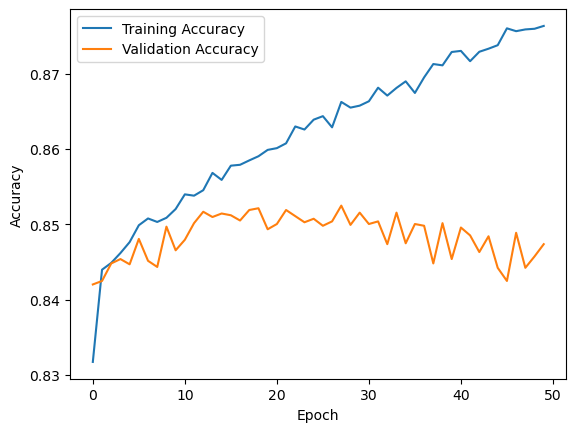

In [86]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 3

In [87]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(12,)),      
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(32, activation='relu'),  
    keras.layers.Dense(1, activation='sigmoid') 
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3490 - accuracy: 0.8366 - val_loss: 0.3317 - val_accuracy: 0.8447
Epoch 2/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3309 - accuracy: 0.8444 - val_loss: 0.3310 - val_accuracy: 0.8440
Epoch 3/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3259 - accuracy: 0.8459 - val_loss: 0.3289 - val_accuracy: 0.8445
Epoch 4/50
1075/1075 [==============================] - 4s 4ms/step - loss: 0.3232 - accuracy: 0.8481 - val_loss: 0.3290 - val_accuracy: 0.8470
Epoch 5/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3204 - accuracy: 0.8485 - val_loss: 0.3240 - val_accuracy: 0.8478
Epoch 6/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3189 - accuracy: 0.8503 - val_loss: 0.3217 - val_accuracy: 0.8484
Epoch 7/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3164 - accuracy: 0.8498 - val_loss: 0.3292 - val_accuracy:

In [88]:
#Eval model on the test data
m3_test_loss, m3_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m3_test_accuracy * 100:.2f}%")

269/269 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.8435
Test Accuracy: 84.35%


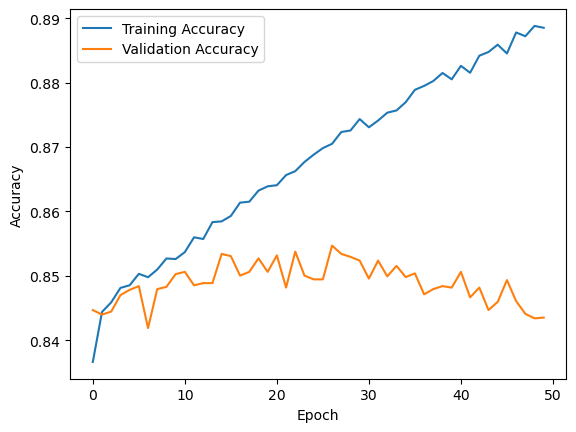

In [89]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Decrease in val accuracy - huge model made it easy to overfit

# Model 4 - (repeat of model 1 for easy comparison)

In [ ]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(12,)),      # Input layer with 13 features
    keras.layers.Dense(32, activation='relu'),  
    keras.layers.Dense(16, activation='relu'),  
    keras.layers.Dense(1, activation='sigmoid') # Output layer with 1 unit and sigmoid activation (for binary classification)
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

#Eval model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 5 - Swish

In [90]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(12,)),      
    keras.layers.Dense(64, activation='swish'),  
    keras.layers.Dense(32, activation='swish'),  
    keras.layers.Dense(1, activation='sigmoid') 
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/50
1075/1075 [==============================] - 4s 2ms/step - loss: 0.3683 - accuracy: 0.8271 - val_loss: 0.3380 - val_accuracy: 0.8398
Epoch 2/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3366 - accuracy: 0.8412 - val_loss: 0.3339 - val_accuracy: 0.8446
Epoch 3/50
1075/1075 [==============================] - 4s 4ms/step - loss: 0.3306 - accuracy: 0.8442 - val_loss: 0.3299 - val_accuracy: 0.8452
Epoch 4/50
1075/1075 [==============================] - 4s 4ms/step - loss: 0.3270 - accuracy: 0.8452 - val_loss: 0.3272 - val_accuracy: 0.8455
Epoch 5/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3244 - accuracy: 0.8462 - val_loss: 0.3239 - val_accuracy: 0.8481
Epoch 6/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3226 - accuracy: 0.8467 - val_loss: 0.3224 - val_accuracy: 0.8482
Epoch 7/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3216 - accuracy: 0.8477 - val_loss: 0.3216 - val_accuracy:

In [93]:
#Eval model on the test data
m5_test_loss, m5_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m5_test_accuracy * 100:.2f}%")

269/269 [==============================] - 1s 2ms/step - loss: 0.3227 - accuracy: 0.8505
Test Accuracy: 85.05%


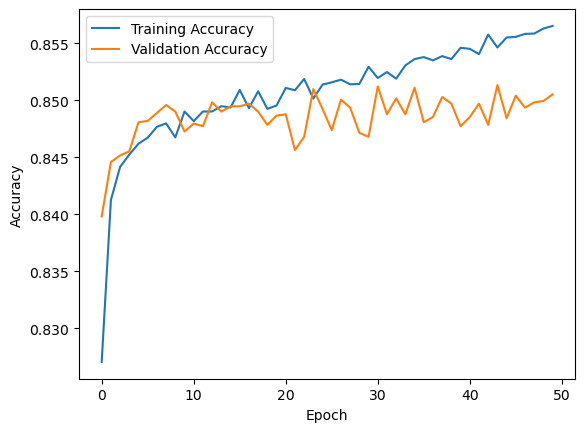

In [94]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 6 - Swish + 0.1 Dropout

In [95]:
# preprocess 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(12,)),      # Input layer with 12 features
    keras.layers.Dense(64, activation='swish'),  
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation='swish'),  
    keras.layers.Dense(1, activation='sigmoid') # Output layer with 1 unit and sigmoid activation (for binary classification)
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3730 - accuracy: 0.8254 - val_loss: 0.3416 - val_accuracy: 0.8421
Epoch 2/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3388 - accuracy: 0.8404 - val_loss: 0.3325 - val_accuracy: 0.8457
Epoch 3/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3337 - accuracy: 0.8420 - val_loss: 0.3298 - val_accuracy: 0.8464
Epoch 4/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3288 - accuracy: 0.8434 - val_loss: 0.3254 - val_accuracy: 0.8457
Epoch 5/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3273 - accuracy: 0.8449 - val_loss: 0.3257 - val_accuracy: 0.8477
Epoch 6/50
1075/1075 [==============================] - 4s 4ms/step - loss: 0.3252 - accuracy: 0.8456 - val_loss: 0.3222 - val_accuracy: 0.8475
Epoch 7/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3238 - accuracy: 0.8459 - val_loss: 0.3227 - val_accuracy:

In [96]:
#Eval model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

269/269 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8495
Test Accuracy: 84.95%


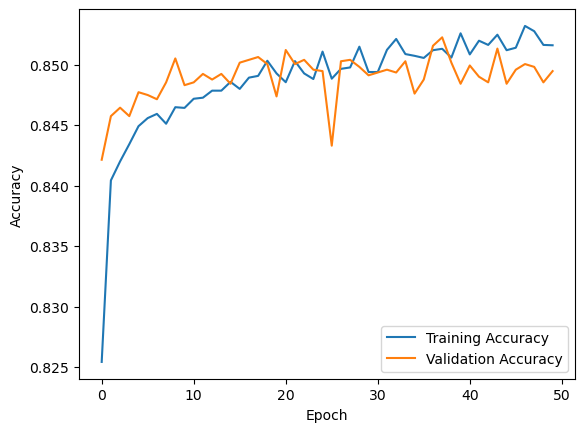

In [97]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 7 - Swish + 0.5 Dropout


In [103]:
# preprocess 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(12,)),     
    keras.layers.Dense(64, activation='swish'),  
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='swish'),  
    keras.layers.Dense(1, activation='sigmoid') 
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3936 - accuracy: 0.8198 - val_loss: 0.3444 - val_accuracy: 0.8386
Epoch 2/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3561 - accuracy: 0.8361 - val_loss: 0.3368 - val_accuracy: 0.8419
Epoch 3/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3471 - accuracy: 0.8353 - val_loss: 0.3336 - val_accuracy: 0.8431
Epoch 4/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3433 - accuracy: 0.8374 - val_loss: 0.3323 - val_accuracy: 0.8438
Epoch 5/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3403 - accuracy: 0.8398 - val_loss: 0.3319 - val_accuracy: 0.8445
Epoch 6/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3385 - accuracy: 0.8396 - val_loss: 0.3307 - val_accuracy: 0.8435
Epoch 7/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3376 - accuracy: 0.8406 - val_loss: 0.3279 - val_accuracy:

In [104]:
#Eval model on the test data
m7_test_loss, m7_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m7_test_accuracy * 100:.2f}%")


269/269 [==============================] - 1s 2ms/step - loss: 0.3194 - accuracy: 0.8512
Test Accuracy: 85.12%


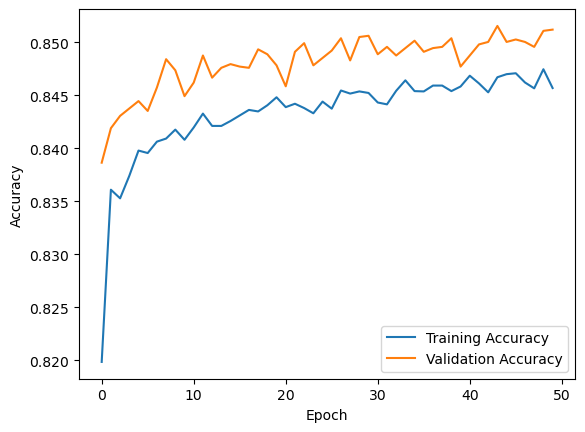

In [105]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 7 - Swish + 0.9 Dropout

Epoch 1/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.4759 - accuracy: 0.7747 - val_loss: 0.3796 - val_accuracy: 0.8252
Epoch 2/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.4183 - accuracy: 0.8040 - val_loss: 0.3728 - val_accuracy: 0.8282
Epoch 3/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.4018 - accuracy: 0.8095 - val_loss: 0.3672 - val_accuracy: 0.8335
Epoch 4/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3936 - accuracy: 0.8133 - val_loss: 0.3641 - val_accuracy: 0.8328
Epoch 5/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3863 - accuracy: 0.8179 - val_loss: 0.3665 - val_accuracy: 0.8336
Epoch 6/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3839 - accuracy: 0.8165 - val_loss: 0.3667 - val_accuracy: 0.8368
Epoch 7/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3837 - accuracy: 0.8182 - val_loss: 0.3640 - val_accuracy:

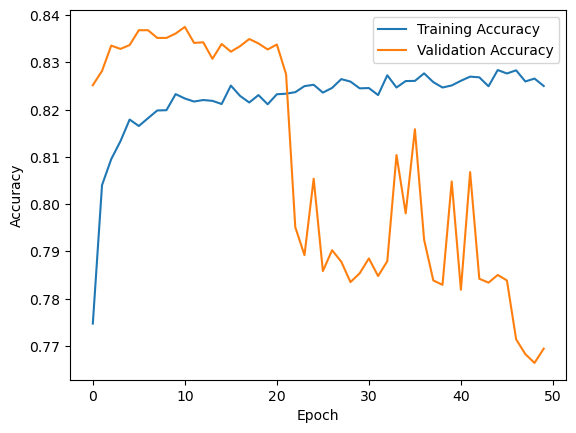

In [375]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(12,)),      # Input layer with 13 features
    keras.layers.Dense(64, activation='swish'),  
    keras.layers.Dropout(0.9),
    keras.layers.Dense(32, activation='swish'),  
    keras.layers.Dense(1, activation='sigmoid') # Output layer with 1 unit and sigmoid activation (for binary classification)
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

#Eval model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Changing data to OneHot Encoder

In [76]:
data2.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [77]:
data2.keys()

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [78]:
hot = preprocessing.OneHotEncoder()
## OH encode selected cols 
cols_to_oh = ['workclass', 'marital-status',
              'occupation', 'relationship', 'race', 'sex', 'native-country']

uncoded_cols = ['age','education-num', 'capital-gain',
       'capital-loss', 'hours-per-week','income']

# OH Encode the selected columns
oh_data = hot.fit_transform(data2[cols_to_oh])

# Convert the result 
oh_df = pd.DataFrame(oh_data.toarray(), columns=hot.get_feature_names_out(cols_to_oh))

# Reset the index of both DataFrames
oh_df.reset_index(drop=True, inplace=True)
data2.reset_index(drop=True, inplace=True)

# Concate OH encoded columns with the uncoded cols
hot_df = pd.concat([oh_df, data2[uncoded_cols]], axis=1)

hot_df.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,...,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,39,13,2174,0,40,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,50,13,0,0,13,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,38,9,0,0,40,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,53,7,0,0,40,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,37,14,0,0,40,0


In [79]:
x_cols = list(hot_df.keys())
x_cols.remove('income')
x_cols


['workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'occupation_ Sales',
 'occupation_ Tech-support',
 'occupation_ Transport-moving',
 'relationship_ Husband',
 'relationship_ Not-in-family',
 'relationship_ Other-relative',
 'relati

In [80]:
## Setting X & Y Values
## Feature Matrix
hX = hot_df[x_cols].values
## Target = 'income'
hy = hot_df['income']

In [81]:
len(x_cols)

89

# Model 8 - OH Data

In [124]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(hX, hy, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(89,)),      
    keras.layers.Dense(32, activation='relu'),  
    keras.layers.Dense(16, activation='relu'),  
    keras.layers.Dense(1, activation='sigmoid') # Output layer with 1 unit and sigmoid activation (for binary classification)
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3591 - accuracy: 0.8304 - val_loss: 0.3335 - val_accuracy: 0.8443
Epoch 2/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3251 - accuracy: 0.8467 - val_loss: 0.3280 - val_accuracy: 0.8469
Epoch 3/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3188 - accuracy: 0.8501 - val_loss: 0.3245 - val_accuracy: 0.8492
Epoch 4/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3141 - accuracy: 0.8530 - val_loss: 0.3293 - val_accuracy: 0.8491
Epoch 5/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3125 - accuracy: 0.8536 - val_loss: 0.3237 - val_accuracy: 0.8503
Epoch 6/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3104 - accuracy: 0.8548 - val_loss: 0.3236 - val_accuracy: 0.8509
Epoch 7/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3093 - accuracy: 0.8547 - val_loss: 0.3240 - val_accuracy:

In [125]:
#Eval model on the test data
m8_test_loss, m8_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m8_test_accuracy * 100:.2f}%")

269/269 [==============================] - 1s 2ms/step - loss: 0.3392 - accuracy: 0.8502
Test Accuracy: 85.02%


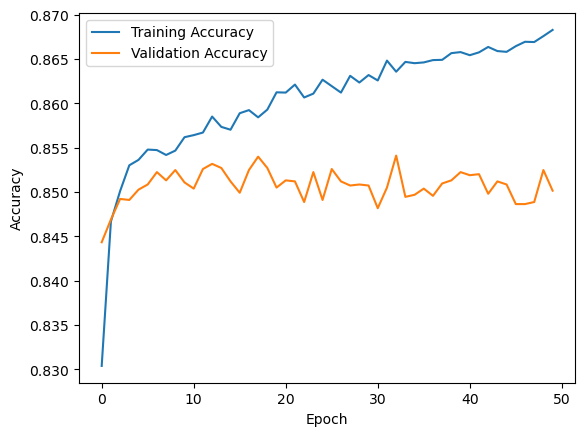

In [126]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 9 - Swish

In [130]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(hX, hy, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(89,)),      
    keras.layers.Dense(64, activation='swish'),  
    keras.layers.Dense(32, activation='swish'),  
    keras.layers.Dense(1, activation='sigmoid') 
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3541 - accuracy: 0.8334 - val_loss: 0.3338 - val_accuracy: 0.8452
Epoch 2/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3225 - accuracy: 0.8479 - val_loss: 0.3258 - val_accuracy: 0.8477
Epoch 3/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3159 - accuracy: 0.8500 - val_loss: 0.3224 - val_accuracy: 0.8485
Epoch 4/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3124 - accuracy: 0.8532 - val_loss: 0.3243 - val_accuracy: 0.8505
Epoch 5/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3098 - accuracy: 0.8541 - val_loss: 0.3251 - val_accuracy: 0.8505
Epoch 6/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3081 - accuracy: 0.8553 - val_loss: 0.3219 - val_accuracy: 0.8507
Epoch 7/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3067 - accuracy: 0.8551 - val_loss: 0.3247 - val_accuracy:

In [131]:
#Eval model on the test data
m9_test_loss, m9_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m9_test_accuracy * 100:.2f}%")

269/269 [==============================] - 1s 2ms/step - loss: 0.4046 - accuracy: 0.8456
Test Accuracy: 84.56%


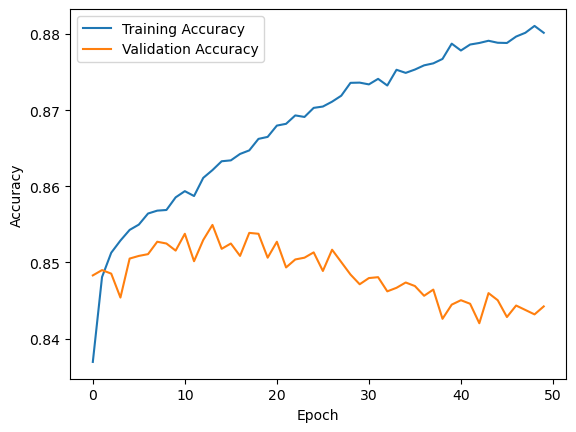

In [129]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 10 - Large model using Swish

In [132]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(hX, hy, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(89,)),      
    keras.layers.Dense(256, activation='swish'),  
    keras.layers.Dense(128, activation='swish'), 
    keras.layers.Dense(64, activation='swish'), 
    keras.layers.Dense(32, activation='swish'),  
    keras.layers.Dense(1, activation='sigmoid') 
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1075/1075 [==============================] - 5s 3ms/step - loss: 0.3425 - accuracy: 0.8398 - val_loss: 0.3267 - val_accuracy: 0.8466
Epoch 2/50
1075/1075 [==============================] - 4s 4ms/step - loss: 0.3231 - accuracy: 0.8486 - val_loss: 0.3293 - val_accuracy: 0.8498
Epoch 3/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3171 - accuracy: 0.8504 - val_loss: 0.3231 - val_accuracy: 0.8520
Epoch 4/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3132 - accuracy: 0.8533 - val_loss: 0.3232 - val_accuracy: 0.8507
Epoch 5/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3096 - accuracy: 0.8548 - val_loss: 0.3225 - val_accuracy: 0.8540
Epoch 6/50
1075/1075 [==============================] - 5s 4ms/step - loss: 0.3046 - accuracy: 0.8562 - val_loss: 0.3189 - val_accuracy: 0.8533
Epoch 7/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3027 - accuracy: 0.8578 - val_loss: 0.3199 - val_accuracy:

In [135]:
#Eval model on the test data
m10_test_loss, m10_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m10_test_accuracy * 100:.2f}%")

269/269 [==============================] - 1s 3ms/step - loss: 0.5500 - accuracy: 0.8395
Test Accuracy: 83.95%


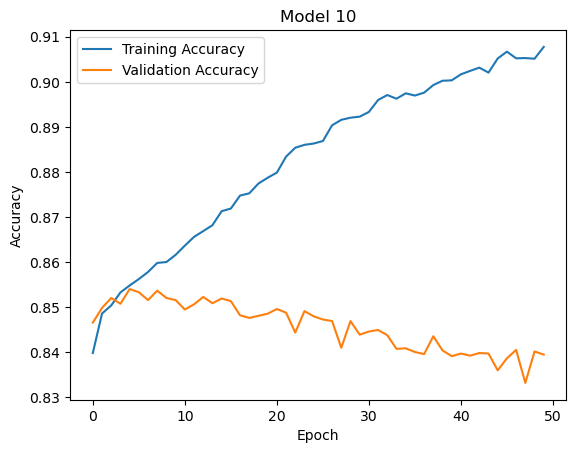

In [136]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 11 - Using Swish and Drop out

In [120]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(hX, hy, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(89,)),      
    keras.layers.Dense(256, activation='swish'), 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='swish'), 
    keras.layers.Dense(64, activation='swish'), 
    keras.layers.Dense(32, activation='swish'),  
    keras.layers.Dense(1, activation='sigmoid') 
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1075/1075 [==============================] - 5s 4ms/step - loss: 0.3515 - accuracy: 0.8354 - val_loss: 0.3284 - val_accuracy: 0.8428
Epoch 2/50
1075/1075 [==============================] - 4s 4ms/step - loss: 0.3309 - accuracy: 0.8436 - val_loss: 0.3308 - val_accuracy: 0.8456
Epoch 3/50
1075/1075 [==============================] - 4s 4ms/step - loss: 0.3240 - accuracy: 0.8485 - val_loss: 0.3233 - val_accuracy: 0.8503
Epoch 4/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3217 - accuracy: 0.8490 - val_loss: 0.3190 - val_accuracy: 0.8526
Epoch 5/50
1075/1075 [==============================] - 5s 4ms/step - loss: 0.3204 - accuracy: 0.8501 - val_loss: 0.3180 - val_accuracy: 0.8537
Epoch 6/50
1075/1075 [==============================] - 4s 4ms/step - loss: 0.3164 - accuracy: 0.8530 - val_loss: 0.3186 - val_accuracy: 0.8524
Epoch 7/50
1075/1075 [==============================] - 5s 4ms/step - loss: 0.3149 - accuracy: 0.8524 - val_loss: 0.3195 - val_accuracy:

In [121]:
#Eval model on the test data
m11_test_loss, m11_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m11_test_accuracy * 100:.2f}%")

269/269 [==============================] - 1s 2ms/step - loss: 0.3265 - accuracy: 0.8542
Test Accuracy: 85.42%


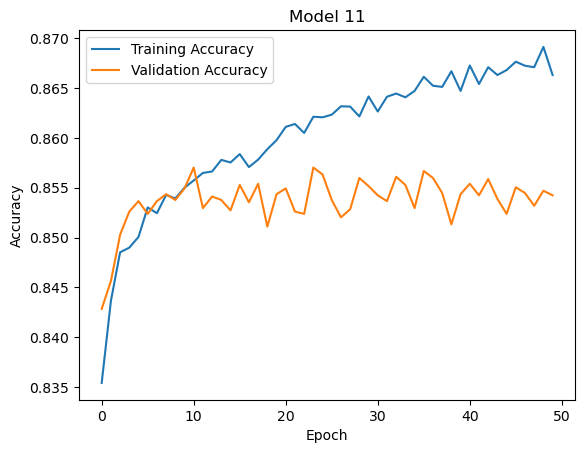

In [122]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 11')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [123]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
confusion = confusion_matrix(y_test, y_pred_binary)

269/269 [==============================] - 1s 2ms/step


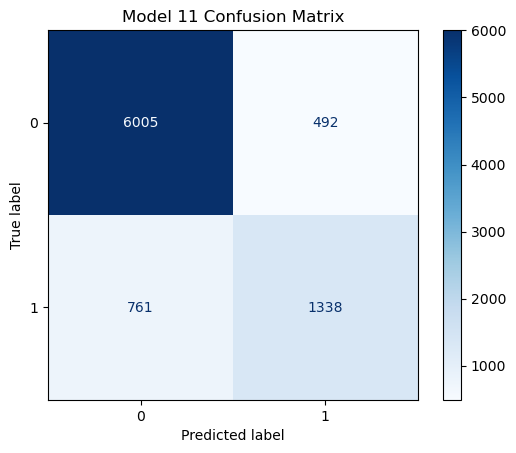

In [124]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Model 11 Confusion Matrix')
plt.show()


## Checking for imbalanced data in my dataset

In [82]:
income_distribution = hot_df['income'].value_counts()

print("Income Distribution:")
print(income_distribution)

Income Distribution:
0    32313
1    10663
Name: income, dtype: int64


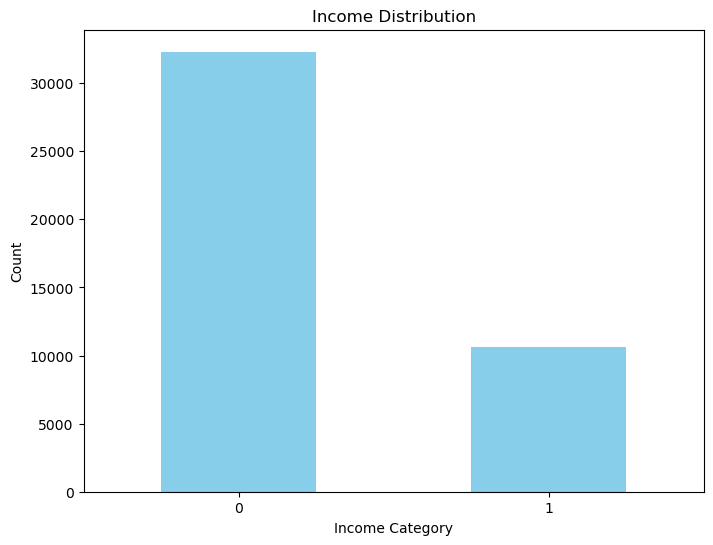

In [83]:
plt.figure(figsize=(8, 6))
income_distribution.plot(kind='bar', color='skyblue')
plt.title('Income Distribution')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [84]:
#!pip install -U imbalanced-learn

In [85]:
from imblearn.combine import SMOTEENN

In [86]:
X = hot_df.drop(columns=['income'])  
y = hot_df['income']  

1    26169
0    22506
Name: income, dtype: int64


In [88]:
#  SMOTEENN 
smote_enn = SMOTEENN(random_state=42)

In [89]:
# Resample 
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [91]:
# Check new class distribution
print(pd.Series(y_resampled).value_counts())

1    26169
0    22506
Name: income, dtype: int64


# Model 12 - Using resampled data

In [92]:
# preprocess 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(89,)),     
    keras.layers.Dense(64, activation='swish'),  
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='swish'),  
    keras.layers.Dense(1, activation='sigmoid') 
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1217/1217 [==============================] - 5s 3ms/step - loss: 0.2834 - accuracy: 0.8845 - val_loss: 0.2245 - val_accuracy: 0.9128
Epoch 2/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.2244 - accuracy: 0.9109 - val_loss: 0.2142 - val_accuracy: 0.9172
Epoch 3/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.2143 - accuracy: 0.9151 - val_loss: 0.2065 - val_accuracy: 0.9192
Epoch 4/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.2058 - accuracy: 0.9177 - val_loss: 0.2037 - val_accuracy: 0.9224
Epoch 5/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.2005 - accuracy: 0.9211 - val_loss: 0.1984 - val_accuracy: 0.9222
Epoch 6/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.1967 - accuracy: 0.9230 - val_loss: 0.1987 - val_accuracy: 0.9245
Epoch 7/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.1952 - accuracy: 0.9231 - val_loss: 0.1957 - val_accuracy:

In [94]:
m12_test_loss, m12_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m12_test_accuracy * 100:.2f}%")

305/305 [==============================] - 1s 2ms/step - loss: 0.1590 - accuracy: 0.9368
Test Accuracy: 93.68%


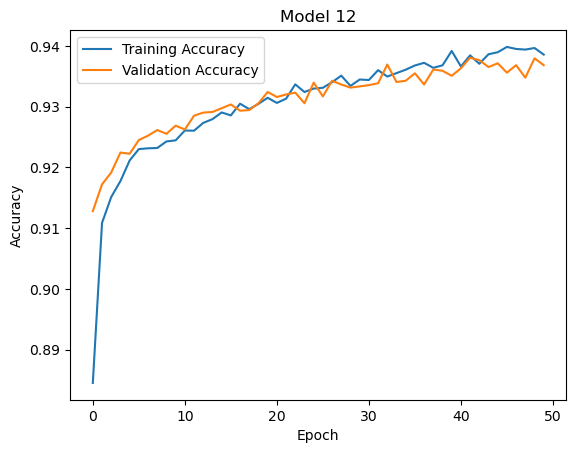

In [96]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 12')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 13 (Model 1 with OH Resampled Data)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#Define the neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(89,)),      
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dense(32, activation='relu'),  
    keras.layers.Dense(1, activation='sigmoid') 
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.2424 - accuracy: 0.9010 - val_loss: 0.2127 - val_accuracy: 0.9186
Epoch 2/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.1958 - accuracy: 0.9225 - val_loss: 0.2002 - val_accuracy: 0.9272
Epoch 3/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.1823 - accuracy: 0.9291 - val_loss: 0.1952 - val_accuracy: 0.9258
Epoch 4/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.1723 - accuracy: 0.9332 - val_loss: 0.1912 - val_accuracy: 0.9278
Epoch 5/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.1653 - accuracy: 0.9354 - val_loss: 0.1828 - val_accuracy: 0.9304
Epoch 6/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.1580 - accuracy: 0.9390 - val_loss: 0.1859 - val_accuracy: 0.9289
Epoch 7/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.1525 - accuracy: 0.9409 - val_loss: 0.1804 - val_accuracy:

In [104]:
m13_test_loss, m13_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m13_test_accuracy * 100:.2f}%")

305/305 [==============================] - 1s 2ms/step - loss: 0.1868 - accuracy: 0.9442
Test Accuracy: 94.42%


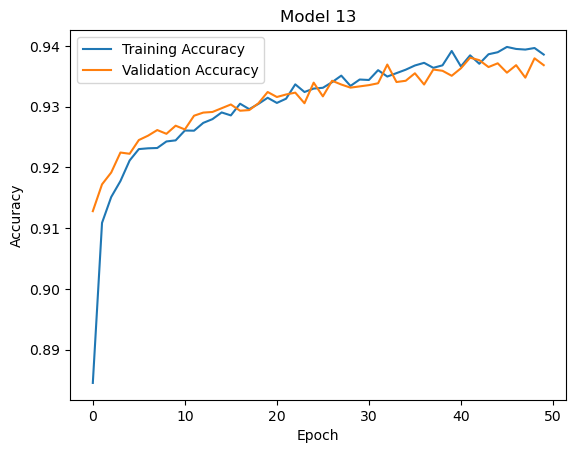

In [102]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 13')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Final Confusion Matrix


In [109]:
y_pred = model.predict(X_test)

305/305 [==============================] - 1s 2ms/step


In [112]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [113]:
confusion = confusion_matrix(y_test, y_pred_binary)

In [114]:
TP = confusion[1, 1]  # True Positives
TN = confusion[0, 0]  # True Negatives
FP = confusion[0, 1]  # False Positives
FN = confusion[1, 0]  # False Negatives

In [115]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.94
Precision: 0.94
Recall: 0.95
F1 Score: 0.95


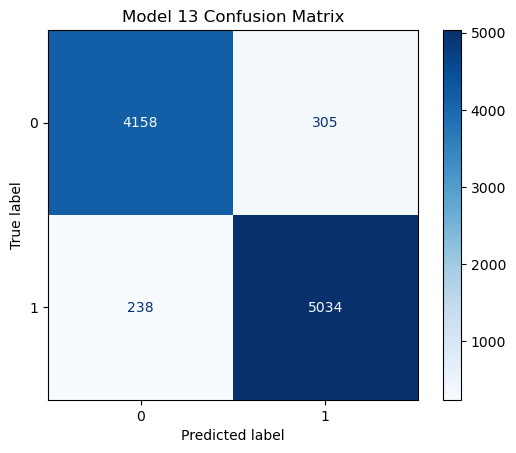

In [117]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Model 13 Confusion Matrix')
plt.show()
